# Classification problem

### Logistic regression
 
    We want to classify wether the patient dies or survives

In [1]:
from matplotlib.pylab import figure, plot, xlabel, ylabel, legend, ylim, show
import matplotlib.pyplot as plt
import sklearn.linear_model as lm
import sklearn
from sklearn.base import clone
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, precision_score
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
filename = 'heart_failure_clinical_records_dataset.csv'
df = pd.read_csv(filename)
y = df['DEATH_EVENT']
X = df.drop(['DEATH_EVENT'], axis = 1)
print(type(y[0]))
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X,y, test_size= 0.2)


<class 'numpy.int64'>


In [4]:
log_reg = lm.LogisticRegression(max_iter= 1000)
log_reg.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

[[36  3]
 [ 5 16]]


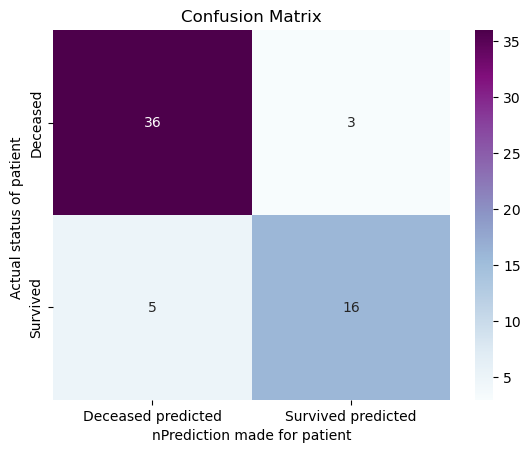

0.8421052631578947

In [5]:
y_pred = log_reg.predict(x_test)

ConfusionMatrix = confusion_matrix(y_test, y_pred)
print(ConfusionMatrix)

ax = sns.heatmap(ConfusionMatrix, annot=True, cmap="BuPu")
ax.set_title("Confusion Matrix");
ax.set_xlabel("nPrediction made for patient")
ax.set_ylabel("Actual status of patient ");
## Ticket labels – List must be in alphabetical order
ax.xaxis.set_ticklabels(["Deceased predicted","Survived predicted"])
ax.yaxis.set_ticklabels(["Deceased","Survived"])
## Display the visualization of the Confusion Matrix.
plt.show()

precision_score(y_test, y_pred)



In [7]:
kfolds = StratifiedKFold(n_splits= 10)

for train_index, test_index in kfolds.split(x_train, y_train):
    clone_LGR = clone(log_reg)
    X_train_folds = x_train.iloc[train_index]
    y_train_folds = y_train.iloc[train_index]
    X_test_folds = x_train.iloc[test_index]
    y_test_folds = y_train.iloc[test_index]

    clone_LGR.fit(X_train_folds, y_train_folds)
    y_pred = clone_LGR.predict(X_test_folds)
    correct = sum(y_test_folds == y_pred)
    print(1 - (correct / len(y_pred)))

0.25
0.125
0.125
0.125
0.16666666666666663
0.33333333333333337
0.25
0.125
0.25
0.21739130434782605
